# Basic simulation template

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
# import package and authenticate (if needed)
import tidy3d as td
import tidy3d.web as web
# web.configure("YOUR API KEY GOES HERE")

In [2]:
# set up parameters of simulation (length scales are micrometers)
freq0 = td.C_0 / 0.75

In [3]:
# create structure
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), 
    medium=td.Medium(permittivity=2.0)
)

In [4]:
# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=freq0 / 10.0),
    polarization="Ey",
)

In [5]:
# create monitor
monitor = td.FieldMonitor(
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields",
    colocate=True,
)

In [6]:
# Initialize simulation
sim = td.Simulation(
    size=(4, 3, 3),
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=25),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=120/freq0,
)

In [7]:
# visualize in 3D
sim.plot_3d(height=400, width=600)

In [8]:
import numpy as np

# import the package and the web API
import tidy3d as td
import tidy3d.web as web


In [9]:
# set up parameters of simulation (length scales are micrometers)
grid_cells_per_wvl = 30
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), medium=dielectric
)

# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization="Ey",
)

# create monitor
monitor = td.FieldMonitor(
    fields=["Ex", "Ey", "Hz"],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name="fields_on_plane",
)

# Initialize simulation
sim = td.Simulation(
    size=sim_size,
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=grid_cells_per_wvl),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
)


[13:09:45] WARNING: Default value for the field monitor           ]8;id=417176;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/monitor.py\monitor.py]8;;\:]8;id=296721;file:///home/momchil/Drive/flexcompute/tidy3d-core/tidy3d_frontend/tidy3d/components/monitor.py#261\261]8;;\
           'colocate' setting has changed to 'True' in Tidy3D                   
           2.4.0. All field components will be colocated to the                 
           grid boundaries. Set to 'False' to get the raw fields                
           on the Yee grid instead.                                             

In [10]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells."
)


simulation grid is shaped [192, 192, 192] for 7 million cells.


In [11]:
# run simulation
data = td.web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=False)

In [12]:
# see the log
print(data.log)


Simulation domain Nx, Ny, Nz: [192, 192, 192]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.3014e+06.
Using subpixel averaging: True
Number of time steps: 1.2659e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 3.1624e-17


Compute source modes time (s):     0.0257
Compute monitor modes time (s):    0.0025
Rest of setup time (s):            2.2009

Running solver for 12659 time steps...
- Time step    506 / time 1.60e-14s (  4 % done), field decay: 1.00e+00
- Time step    839 / time 2.65e-14s (  6 % done), field decay: 1.00e+00
- Time step   1012 / time 3.20e-14s (  8 % done), field decay: 1.00e+00
- Time step   1519 / time 4.80e-14s ( 12 % done), field decay: 1.44e-01
- Time step   2025 / time 6.40e-14s ( 16 % done), field decay: 3.24e-02
- Time step   2531 / time 8.00e-14s ( 20 % done), field decay: 1.38e-02
- Time step   3038 / time 9.61e-14s ( 24 % done), field decay: 6.96e-03
- Time step   3544 / time 1.12e-13s ( 28 % done), field decay: 3.33e-03
- Time

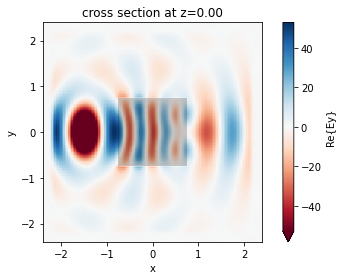

In [13]:
# plot the field data stored in the monitor
ax = data.plot_field("fields_on_plane", "Ey", z=0)